# Part 1 : Generate Linearly Separable Data

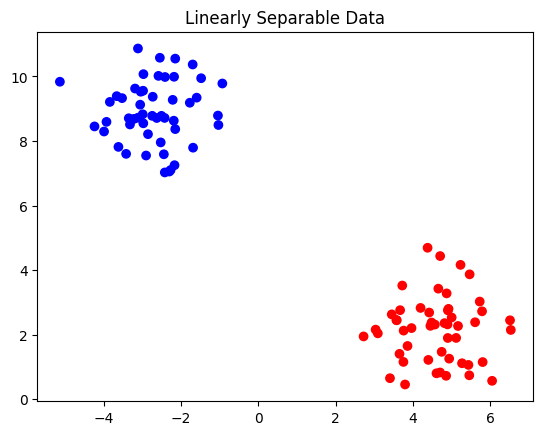

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples =100, centers=2,random_state=42, cluster_std = 1.0)
y = np.where(y==0,-1,1)
#Convert labels from {0,1}
plt.scatter(X[:,0],X[:,1],c=y, cmap='bwr')
plt.title("Linearly Separable Data")
plt.show()

# Part 2 :

In [18]:
from sklearn.svm import SVC

svm_hard = SVC(kernel = 'linear',C = 1e6)
svm_hard.fit(X,y)

print("Number of support vectors: ", len(svm_hard.support_vectors_))

Number of support vectors:  2


In [19]:
w = svm_hard.coef_[0] #weight vector
b = svm_hard.intercept_[0]

print("w:",w)
print("b:",b)

w: [ 0.24748994 -0.17407192]
b: 0.7341550476191021


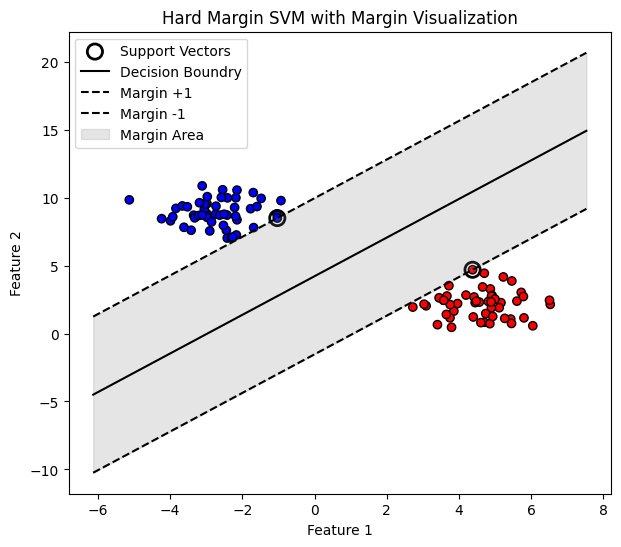

In [20]:
plt.figure(figsize=(7,6))
# Plot data points
plt.scatter(X[:,0],X[:,1], c=y, cmap='bwr', edgecolors ='k')

#Highlight support vectors
plt.scatter(
    svm_hard.support_vectors_[:,0],
    svm_hard.support_vectors_[:,1],
    s = 120, facecolors='None', edgecolors='k',linewidth=2,
    label = "Support Vectors"
)

# Create x values for line plotting
x_vals = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200)

# Decision boundry: w-x + b =0
y_decision = -(w[0] * x_vals +b)/w[1]

# Margin boundaries: w.x + b = +_1
y_margin_pos = -(w[0] * x_vals +b-1)/w[1]
y_margin_neg = -(w[0] * x_vals +b+1)/w[1]

#plot lines
plt.plot(x_vals, y_decision,'k-',label="Decision Boundry")
plt.plot(x_vals, y_margin_pos,'k--',label="Margin +1")
plt.plot(x_vals, y_margin_neg,'k--',label="Margin -1")

# Shade margin area 
plt.fill_between(
    x_vals, y_margin_pos,y_margin_neg,
    color='gray',alpha =0.2, label = "Margin Area"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hard Margin SVM with Margin Visualization")
plt.legend()
plt.show()

# Part 3: Generate Overlapping Data

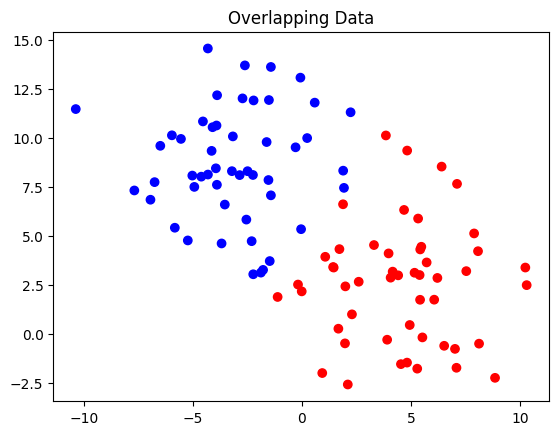

In [21]:
X_overlap, y_overlap = make_blobs(n_samples = 100, centers = 2, random_state=42, cluster_std  =3)
y_overlap = np.where(y_overlap == 0,-1,1)

plt.scatter(X_overlap[:,0],X_overlap[:,1],c=y_overlap,cmap = 'bwr')
plt.title("Overlapping Data")
plt.show()

In [22]:
from sklearn.svm import SVC

#Hard Margin SVM (very large C)
svm_hard = SVC(kernel ='linear', C = 1e6)
svm_hard.fit(X_overlap,y_overlap)

print("Number of support vectors: ",
      len(svm_hard.support_vectors_))

Number of support vectors:  3


In [23]:
w = svm_hard.coef_[0]       #Weight vector
b = svm_hard.intercept_[0]  # Bias

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

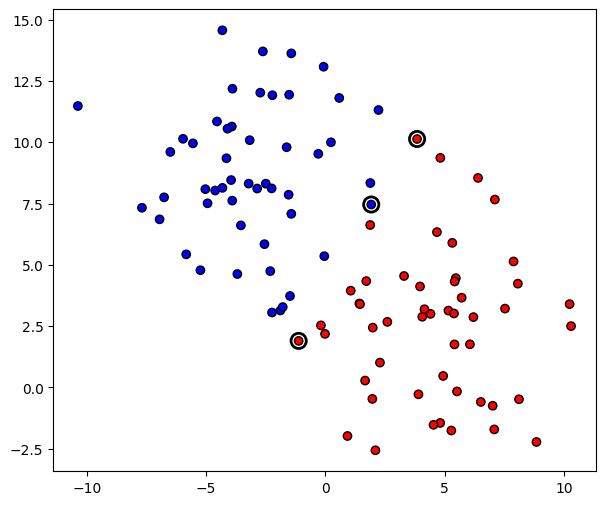

In [24]:
w = svm_hard.coef_[0]      
b = svm_hard.intercept_[0]  

plt.figure(figsize=(7,6))
plt.scatter(X_overlap[:,0],X_overlap[:,1],
            c = y_overlap, cmap='bwr',edgecolors = 'k')

#Support vectors
plt.scatter(
            svm_hard.support_vectors_[:,0],
            svm_hard.support_vectors_[:,1],
            s = 120, facecolors ='None',edgecolors='k',
            linewidths=2, label= "Support Vectors"
            )

# Decision boundary and margins
x_vals = np.linspace(
    X_overlap[:,0].min()-1,
    X_overlap[:,0].max()+1,
    200
)

y_decision = -(w[0]* x_vals +b) / w[1]
y_margin_pos = -(w[0]* x_vals + b - 1) / w[1]
y_margin_neg = -(w[0] * x_vals + b + 1) / w[1]

plt.plot

soft margin svm 

In [25]:
from sklearn.svm import SVC

#soft margin svm
svm_soft = SVC(kernel = 'linear' , C=1.0)
svm_soft.fit(X_overlap,y_overlap)

print("Number of support vectors: ", len(svm_soft.support_vectors_))


Number of support vectors:  6


# Plot soft margin decision boundary

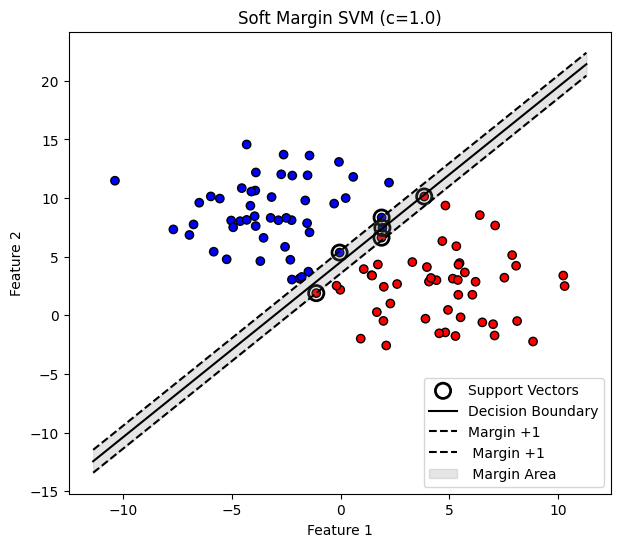

In [26]:
w_soft = svm_soft.coef_[0]
b_soft = svm_soft.intercept_[0]

plt.figure(figsize=(7,6))
plt.scatter(X_overlap[:,0], X_overlap[:,1],
            c = y_overlap, cmap = 'bwr',edgecolors='k')

#Support vectors

plt.scatter(
    svm_soft.support_vectors_[:,0],
    svm_soft.support_vectors_[:,1],
    s = 120, facecolors = 'None', edgecolors ='k',
    linewidth = 2, label = "Support Vectors"
    
)

# Decision boundry and margins
x_vals = np.linspace(
    X_overlap[:,0].min()-1,
    X_overlap[:,0].max()+1,
    200
)


y_decision = -(w_soft[0]*x_vals + b_soft) / w_soft[1]
y_margin_pos = -(w_soft[0]*x_vals + b_soft -1) / w_soft[1]
y_margin_neg = -(w_soft[0]*x_vals + b_soft +1) / w_soft[1]


plt.plot(x_vals, y_decision,'k-', label="Decision Boundary")
plt.plot(x_vals, y_margin_pos,'k--', label="Margin +1")
plt.plot(x_vals, y_margin_neg,'k--', label=" Margin +1")

plt.fill_between(x_vals,y_margin_pos,y_margin_neg,color='gray', alpha = 0.2, label =" Margin Area")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Soft Margin SVM (c=1.0)")
plt.legend()
plt.show()